**Superstore Sales analysis**

Analysis for a big store in united states that distributes various products to multiple states and cities.


*   In this project, we analyzed a Super Store Sales dataset to gain valuable insights into sales performance, customer behavior, and seasonal trends. The goal was to clean, explore, and visualize the data to support data-driven decision-making.






**Code Pipeline**

* 1- Import libraries
* 2- Reading and exploring  data.
* 3-  Data Cleaning & Processing.
*  4- Exploratory Data Analysis (questions and answers from data) .
* 5- Summarized Insights in a Single Graph (Python) .
* 6- Business Recommendations.



**1-Import libraries**

In [1]:
#mathematical libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import modules for customize the colors
from matplotlib import cm
from matplotlib.ticker import FuncFormatter

**2-Reading and exploring data**

In [2]:
#reading data
df=pd.read_csv("/content/drive/MyDrive/DEPI_Graduation_project/Superstore Sales Dataset.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float



*   Almost data is cleaned except "Postal code" column has 11 nulls
*   we will chamge "order data" and "ship data" to date time columns




**3-Data Cleaning & Processing**

In [4]:
# Convert to datetime (since it's in day-first format)
df['Ship Date'] = pd.to_datetime(df['Ship Date'] , dayfirst=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Change the format to MM-DD-YYYY
df['Ship Date'] = df['Ship Date'].dt.strftime('%m-%d-%Y')
df['Order Date'] = df['Order Date'].dt.strftime('%m-%d-%Y')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# now change ship date , order date to date time format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
#delete columns('postal code' ,Row id')that won't be important in analysis stage
df.drop(columns=['Postal Code','Row ID'],inplace=True)
df.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [ ]:
df.shape

(9800, 16)

In [8]:
# chck duplicates
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [9]:
df.drop_duplicates(inplace =True)
df.shape

(9799, 16)



*   there is no duplicates in data and the data is ready to analysis stage




In [10]:
#check validate dates(ship date before order date )
df[df['Ship Date']< df['Order Date']].value_counts()

,,,,,,,,,,,,,,,,count
Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,


In [12]:
#remove extra spaces in data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-12-9f1a00278b8b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [13]:
#save the data after edu=iting
df.to_csv("super store_clean.csv")

**4-Exploratory data analysis**

**customer sales analysis**

In [14]:
#average sales by customers
df.groupby("Customer Name")["Sales"].sum().mean()

np.float64(2851.520063934426)

<ipython-input-15-860e6c180150>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')  # Use a blue colormap


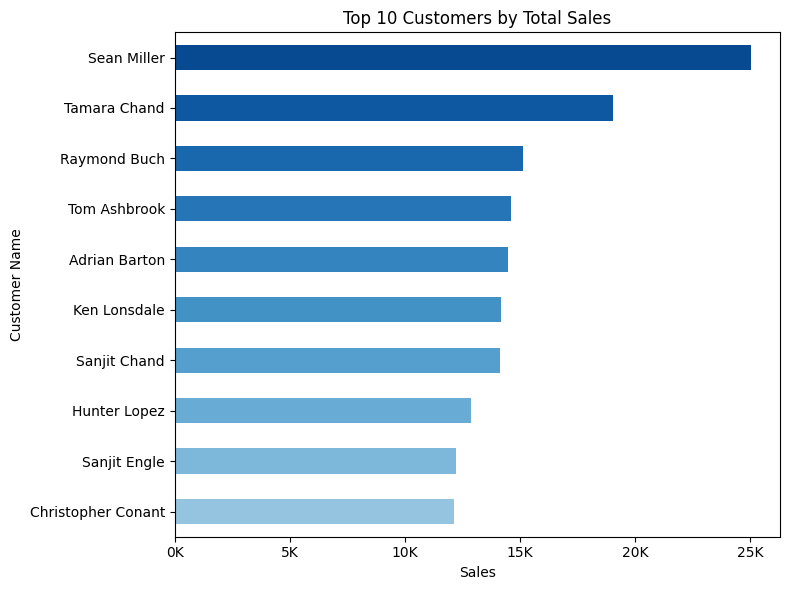

In [15]:
#Top 10 customers by total sales
top_customers=df.groupby("Customer Name")["Sales"].sum().nlargest(10).sort_values()
colors = ['#488A99'] * len(top_customers)
alphas = np.linspace(0.4, 1.0, len(top_customers))  # gradient from light to full color

cmap = cm.get_cmap('Blues')  # Use a blue colormap
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(top_customers))]  # Gradient steps

ax = top_customers.plot(kind='barh', color=colors, figsize=(8, 6))

# Format y-axis to show numbers in 'K'
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Revenue by customer segment')

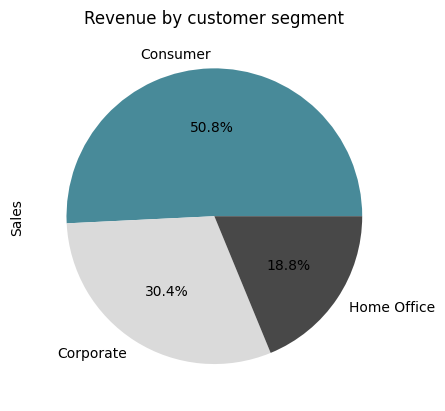

In [16]:
#Revenue by customer segment
colors = ['#488A99','#DADADA' ,'#484848']

df.groupby("Segment")["Sales"].sum().sort_values(ascending=False).plot(kind="pie",autopct='%1.1f%%',colors=colors)
plt.title("Revenue by customer segment")

In [17]:

# What is the total sales revenue?
total_revenue = df['Sales'].sum()
print(f'Total Sales Revenue: ${total_revenue:,.2f}')

Total Sales Revenue: $2,261,255.41


In [18]:
#make new column for order year
df['order_year']=df['Order Date'].dt.year
# make new column for order month
df['order_month']=df['Order Date'].dt.month

df.shape

(9799, 18)

<ipython-input-19-d1599c7f99ab>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


<Figure size 640x480 with 0 Axes>

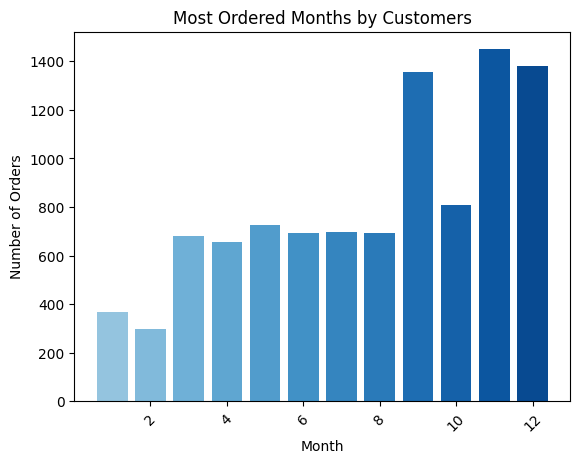

<Figure size 640x480 with 0 Axes>

In [19]:
#the most order month used by customers

# Count orders by month
month_orders = df['order_month'].value_counts().sort_index()

# Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(month_orders))]

plt.bar(month_orders.index, month_orders.values, color=colors)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Most Ordered Months by Customers")
plt.xticks(rotation=45) # rotate x axis label
plt.figure()





*   November is the top in sales monthes and Febreuary is the bottom




**Explore Product analysis**

<ipython-input-20-247ddef5c7c6>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


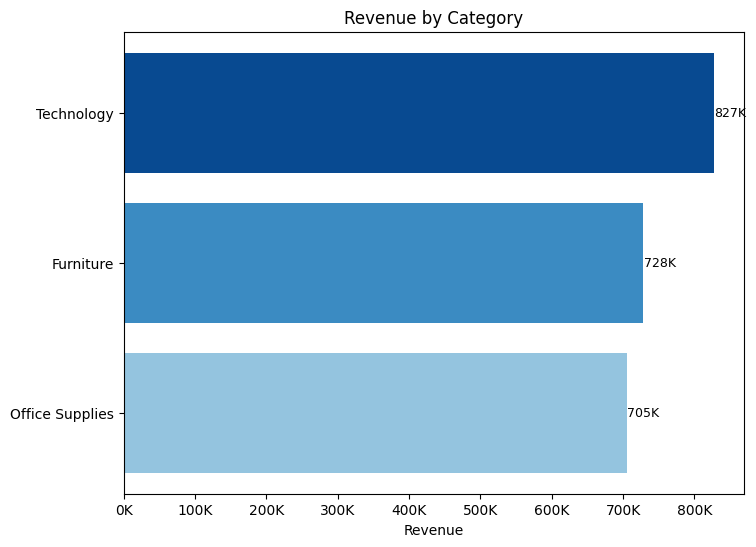

In [20]:
# Which product category generates the highest revenue?
category_revenue = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)

# Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(category_revenue))]

# Plot
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(category_revenue.index, category_revenue.values, color=colors)

# Format x-axis with 'K'
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Add value labels next to each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2, f'{int(width/1000)}K',
            va='center', fontsize=9, color='black')

plt.title("Revenue by Category")
plt.xlabel("Revenue")
plt.show()


In [21]:
#Average sales by categories
df.groupby('Category')['Sales'].sum().mean()

np.float64(753751.8035666667)

<ipython-input-22-d343b299655d>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


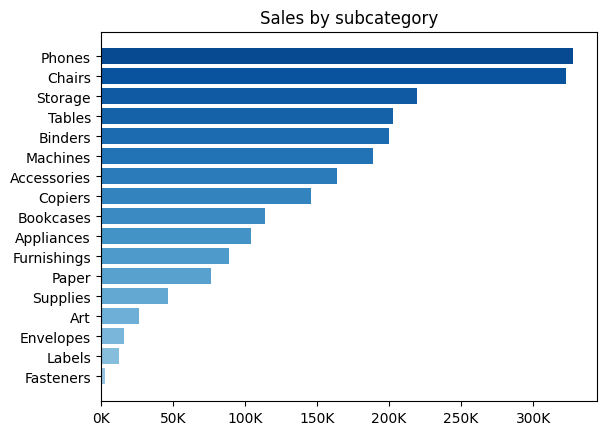

In [22]:
# Which sub-category has the highest sales?
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True)
# Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(subcategory_sales))]
fig, ax = plt.subplots()
bars = ax.barh(subcategory_sales.index, subcategory_sales.values, color=colors)

# Format x-axis with 'K'
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.title("Sales by subcategory")
plt.show()


<ipython-input-23-767967da1967>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


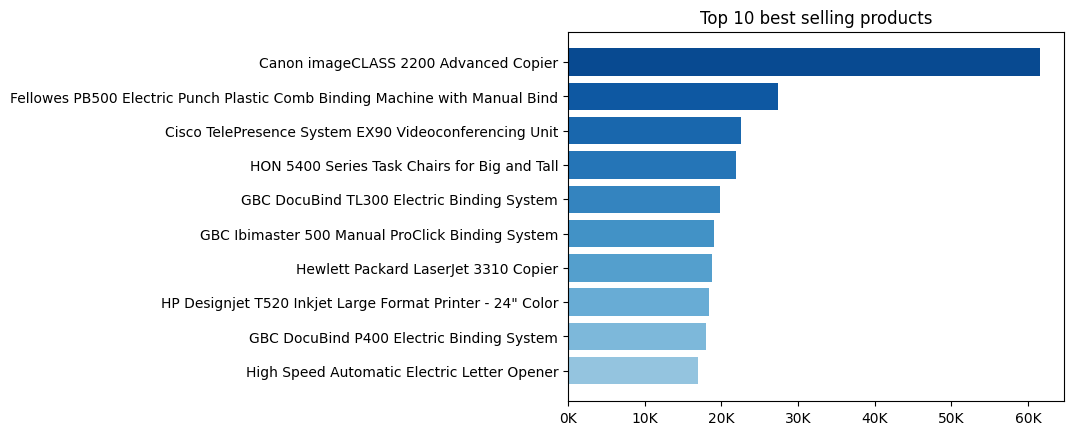

In [23]:
# whate  are the top 10 best-selling products?
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).sort_values(ascending=True)
# Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(top_products))]
fig, ax = plt.subplots()
bars = ax.barh(top_products.index, top_products.values, color=colors)

# Format x-axis with 'K'
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.title("Top 10 best selling products")
plt.show()

<ipython-input-24-efbd87749845>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


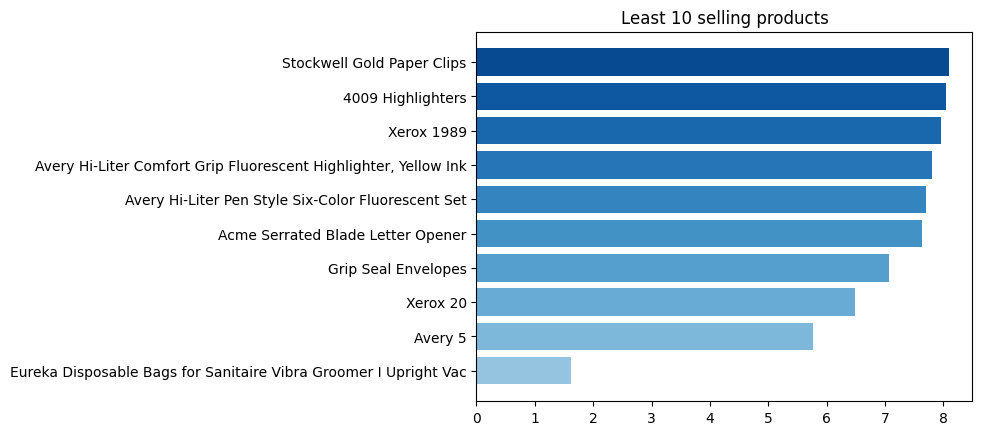

In [24]:

# What are the least-selling products?
least_selling_products =  df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10)
# Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(least_selling_products))]

plt.barh(least_selling_products.index, least_selling_products.values, color=colors)
plt.title("Least 10 selling products")
plt.show()

**Explore sales analysis by Region**

In [25]:
#best sales by countries
country_sales = df.groupby("Country")["Sales"].sum().sort_values(ascending=False)

# Format in $M
formatted_sales = country_sales.apply(lambda x: f"${x/1_000_000:.2f}M")
formatted_sales

,Sales
Country,
United States,$2.26M


In [26]:
#sales insights
sales_insights = df["Sales"].agg(['mean', 'min', 'max'])
print(sales_insights)

mean      230.763895
min         0.444000
max     22638.480000
Name: Sales, dtype: float64


<ipython-input-27-508e00684e91>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


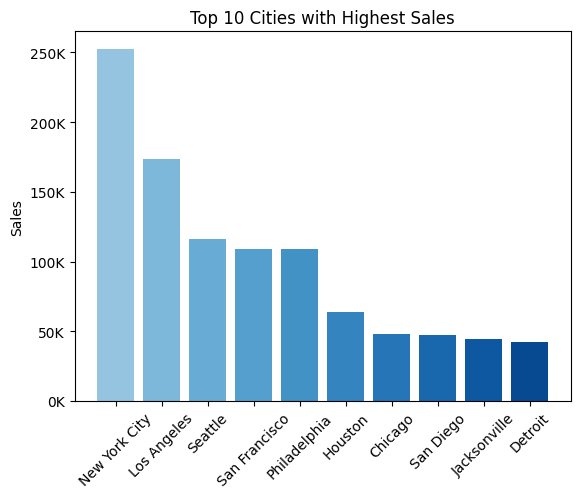

In [27]:
#top 10 cities by sales
Top_cities=df.groupby("City")["Sales"].sum().sort_values(ascending=False).nlargest(10)
# Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(Top_cities))]
# Create plot
fig, ax = plt.subplots( )
bars = ax.bar(Top_cities.index, Top_cities.values, color=colors)

# Format y-axis numbers with 'K'
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Rotate x-axis labels
plt.xticks(rotation=45)

ax.set_title("Top 10 Cities with Highest Sales")
ax.set_ylabel("Sales")
plt.show()

Text(0.5, 1.0, 'Sales by Region')

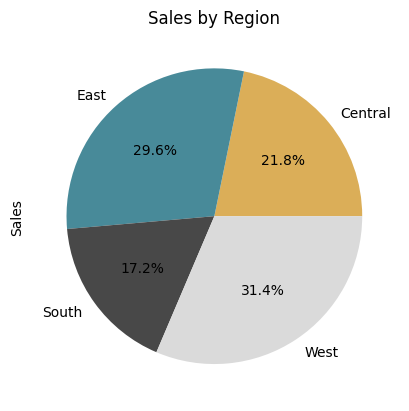

In [28]:
 # How do sales vary across different regions?
colors=['#DBAE58','#488A99','#484848','#DADADA']
df.groupby("Region")["Sales"].sum().plot(kind="pie",autopct='%1.1f%%',colors=colors)
plt.title("Sales by Region")

<ipython-input-29-db1c1e2c1254>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


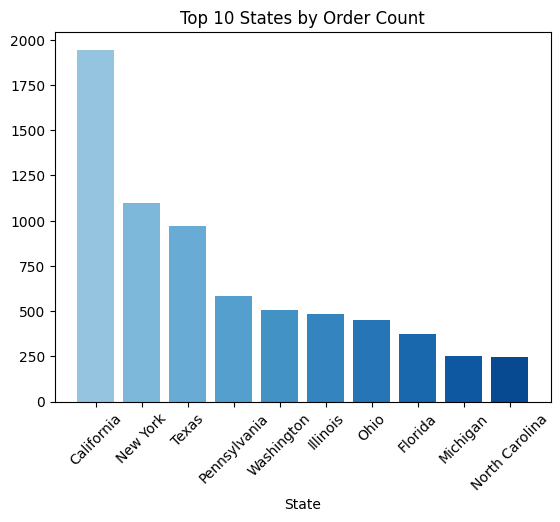

In [29]:
# What is the distribution of orders by state?
State_orders=df["State"].value_counts().head(10)  # Top 10 states by order count
#colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(Top_cities))]
plt.bar(State_orders.index , State_orders.values,color=colors)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title("Top 10 States by Order Count")
plt.xlabel("State")
#plt.ylabel("Number of Orders")
plt.show()

<ipython-input-30-d2129139010b>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


Text(0.5, 1.0, 'Top 10 States by sales')

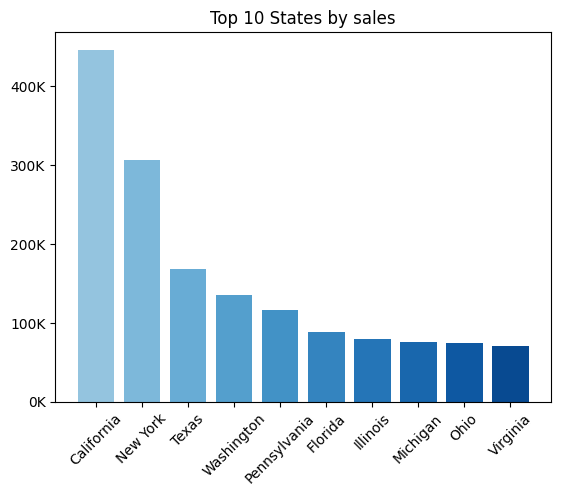

In [30]:
#top 10 states by sales
Top_states=df.groupby("State")["Sales"].sum().nlargest(10)
 # Create gradient blue colors
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 0.9, len(Top_states))]
fig, ax = plt.subplots()
bars = ax.bar(Top_states.index, Top_states.values, color=colors)

# Format x-axis with 'K'
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.xticks(rotation=45)  #rotate x axis

plt.title("Top 10 States by sales")
#plt.xlabel("State")
#plt.ylabel("Sales")

**Explore shipping analysis**

In [31]:
# calculate time shipping
df["Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
average_shipping_time = df["Shipping Time"].mean()
print("Average Shipping Time:", average_shipping_time)

Average Shipping Time: 3.9611184814777016


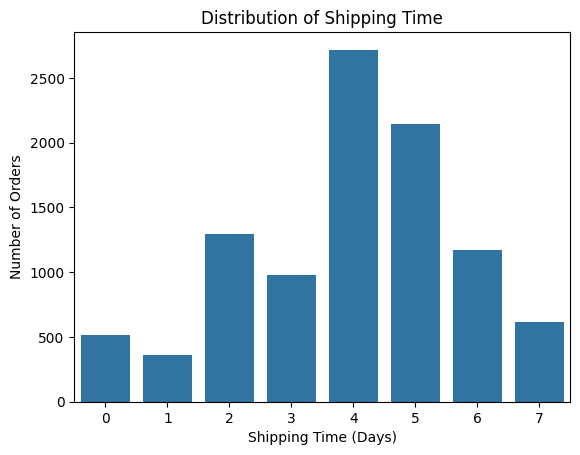

In [32]:
#Distribution for shipping time
plt.figure()
sns.barplot(x=df["Shipping Time"].value_counts().index, y=df["Shipping Time"].value_counts().values )
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Shipping Time")
plt.show()

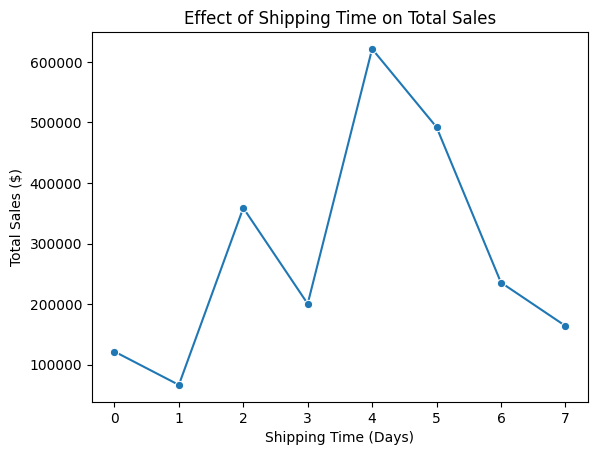

In [33]:
# effect of shipping time on sales
plt.figure()
sns.lineplot(x=df.groupby("Shipping Time")["Sales"].sum().index, y=df.groupby("Shipping Time")["Sales"].sum().values, marker="o")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Total Sales ($)")
plt.title("Effect of Shipping Time on Total Sales")
plt.show()

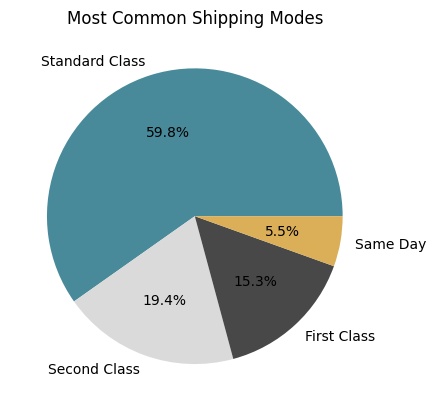

In [34]:
# the most shipping time used
plt.figure()  #DBAE58     #DADADA
colors=['#488A99','#DADADA','#484848','#DBAE58']
plt.pie(df["Ship Mode"].value_counts(), labels=df["Ship Mode"].value_counts().index, autopct='%1.1f%%',colors=colors)
plt.title("Most Common Shipping Modes")
plt.show()

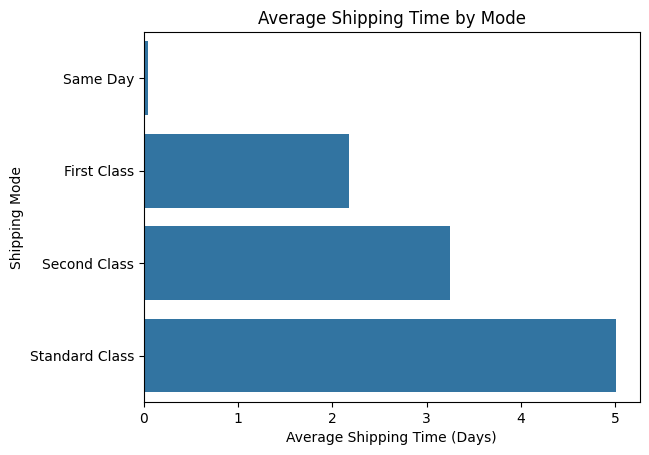

In [35]:
# The fast shipping type used
plt.figure()
sns.barplot(y=df.groupby("Ship Mode")["Shipping Time"].mean().sort_values().index, x=df.groupby("Ship Mode")["Shipping Time"].mean().sort_values().values)
plt.ylabel("Shipping Mode")
plt.xlabel("Average Shipping Time (Days)")
plt.title("Average Shipping Time by Mode")
plt.show()

****Trend and seasonal analysis****

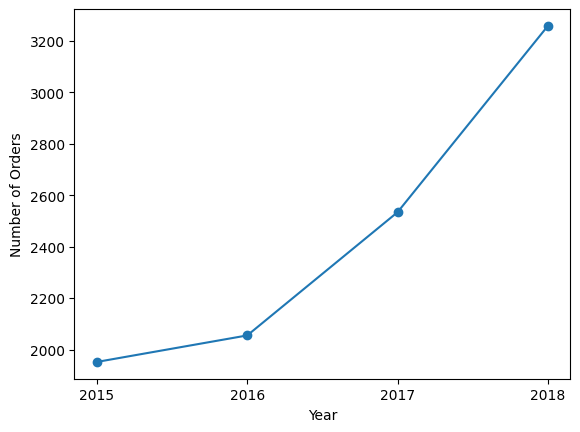

In [36]:
# number of orders for each year
order_year=df['order_year'].value_counts().sort_index()
order_year.plot(kind="line" , marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.xticks(order_year.index)
plt.show()



*   It is noticeable that the number of orders increases gradually each year, but this does not necessarily mean that total sales are higher, as it depends on the quantity and price of each product ordered.




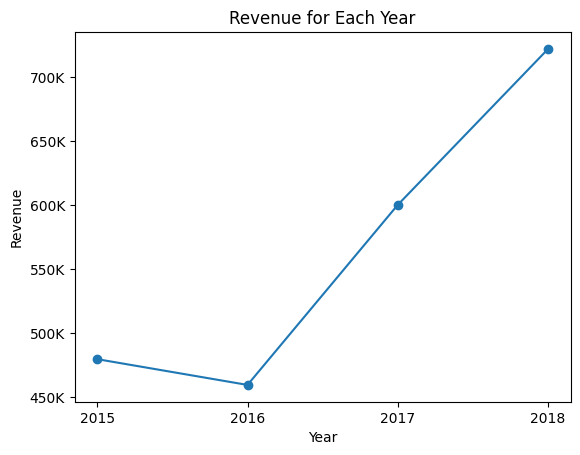

In [37]:
# revenue for each year
revenue_year = df.groupby("order_year")["Sales"].sum()

ax = revenue_year.plot(kind="line", marker='o')
plt.xlabel("Year")
plt.ylabel("Revenue")  # Changed y-label
plt.title("Revenue for Each Year")
plt.xticks(revenue_year.index)

# Format the y-axis to display values in thousands (K)
formatter = FuncFormatter(lambda x, pos: f'{x / 1000:,.0f}K')
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [38]:
#  check first and last months in sales in dataset
df[df['order_year']==2015 ]['order_month'].min()

1

In [39]:
# check last month in sales
df[df['order_year']==2018]['order_month'].max()

12



*   Create visuals for seasonal analysis




In [40]:
#sales trend by quarters

# Set 'Order Date' as index
# important because time series analysis requires the date to be the index for resampling and trend analysis.

df.set_index('Order Date', inplace=True)

<ipython-input-44-0245da841261>:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df['Sales'].resample('Q').sum().plot(kind='line', marker='o', linestyle='-', ax=axes[0, 1], color=blue)


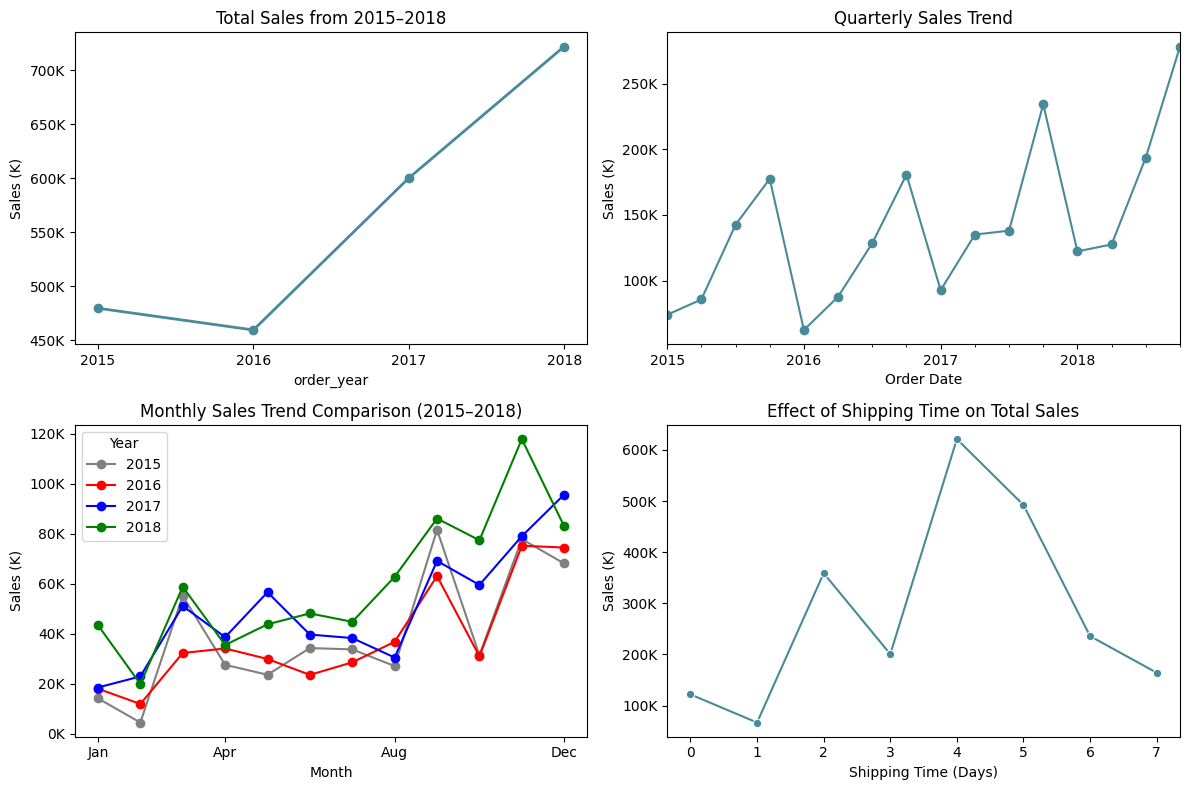

In [44]:
# Set base color
blue = "#488A99"

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Sales trend over years
year_trend = df.groupby(df['order_year'])['Sales'].sum()
year_trend.plot(kind='line', ax=axes[0, 0], marker='o', linewidth=2, color=blue)

axes[0, 0].set_title("Total Sales from 2015–2018")
axes[0, 0].set_ylabel("Sales (K)")
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
axes[0, 0].set_xticks(year_trend.index)
axes[0, 0].set_xticklabels([str(int(year)) for year in year_trend.index])

# 2. Quarterly sales trend
df['Sales'].resample('Q').sum().plot(kind='line', marker='o', linestyle='-', ax=axes[0, 1], color=blue)
axes[0, 1].set_title("Quarterly Sales Trend")
axes[0, 1].set_ylabel("Sales (K)")
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# 3. Monthly sales trend comparison with custom colors
df['Year'] = df.index.year
df['Month'] = df.index.month
df_monthly_trend = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0)

# Custom colors for each year
custom_colors = {
    2015: 'gray',
    2016: 'red',   # Lowest sales year
    2017: 'blue',
    2018: 'green'  # Highest sales year
}

# Match colors to the year order in the dataframe
year_order = df_monthly_trend.columns.tolist()
colors = [custom_colors[year] for year in year_order]

# Plot with custom colors
df_monthly_trend.plot(marker='o', linestyle='-', ax=axes[1, 0], color=colors)
axes[1, 0].set_title("Monthly Sales Trend Comparison (2015–2018)")
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Sales (K)")
axes[1, 0].set_xticks([1, 4, 8, 12])
axes[1, 0].set_xticklabels(['Jan', 'Apr', 'Aug', 'Dec'])
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# 4. Effect of shipping time on sales
shipping_sales = df.groupby("Shipping Time")["Sales"].sum()
sns.lineplot(x=shipping_sales.index, y=shipping_sales.values,
             marker="o", ax=axes[1, 1], color=blue)
axes[1, 1].set_title("Effect of Shipping Time on Total Sales")
axes[1, 1].set_xlabel("Shipping Time (Days)")
axes[1, 1].set_ylabel("Sales (K)")
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()


**Explore if there any correlation between features**

Region        Central  East  South  West
Sub-Category                            
Accessories       174   203    125   254
Appliances        122   123     81   133
Art               175   225    140   245
Binders           362   427    241   462
Bookcases          49    70     28    79
Chairs            151   166     86   203
Copiers            16    20      7    23
Envelopes          58    70     54    66
Fasteners          53    61     29    71
Furnishings       198   275    162   296
Labels             75   105     64   113
Machines           21    37     18    39
Paper             313   367    218   440
Phones            197   267    139   273
Storage           205   237    127   263
Supplies           36    52     29    67
Tables             72    79     50   113


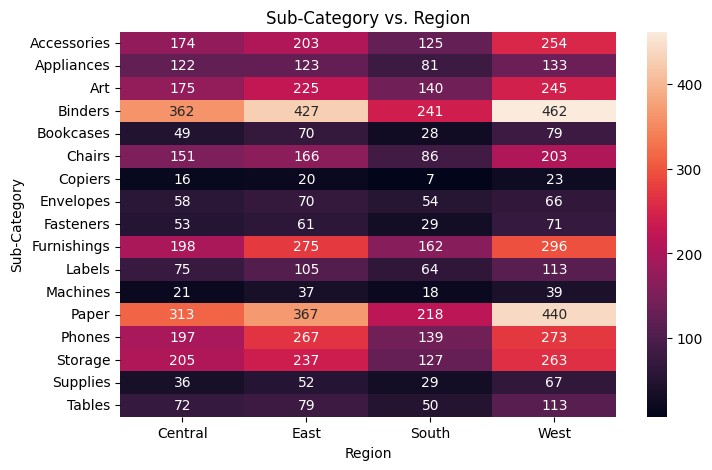

In [41]:
#correlation between product sub-category and shipping mode?
Subcategory_Region = pd.crosstab(df['Sub-Category'], df['Region'])
print(Subcategory_Region)

plt.figure(figsize=(8, 5))
sns.heatmap(Subcategory_Region, annot=True, fmt='d')
plt.title('Sub-Category vs. Region')
plt.xlabel('Region')
plt.ylabel('Sub-Category')
plt.show()



*   From figure "Binders" were the most subcategory sold by Regions  and "Copiers were the bottom sales by regions.

* "Bookcases","Machines" , "Supplies" and "Copiers"  were the least group Subcategories by sales .
* "Binders" and "Paper" were the Top .



Text(0.5, 1.0, 'correlation map sales and time')

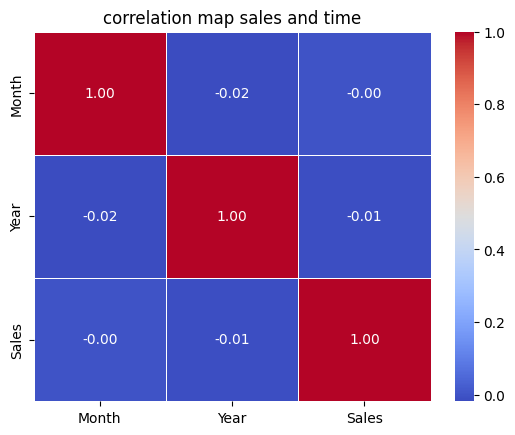

In [45]:
#correlatoin between sales and time
num_df=df[['Month','Year','Sales']]
correlation_matrix=num_df.corr()
#plt.figure(figsize=(8,12))
sns.heatmap(correlation_matrix , annot=True , cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("correlation map sales and time")



*    From figure there is no correlation between dates and sales !



**Create dashboard with the most important information**

<ipython-input-46-9edff7acf4a6>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')  # Gradient for bars


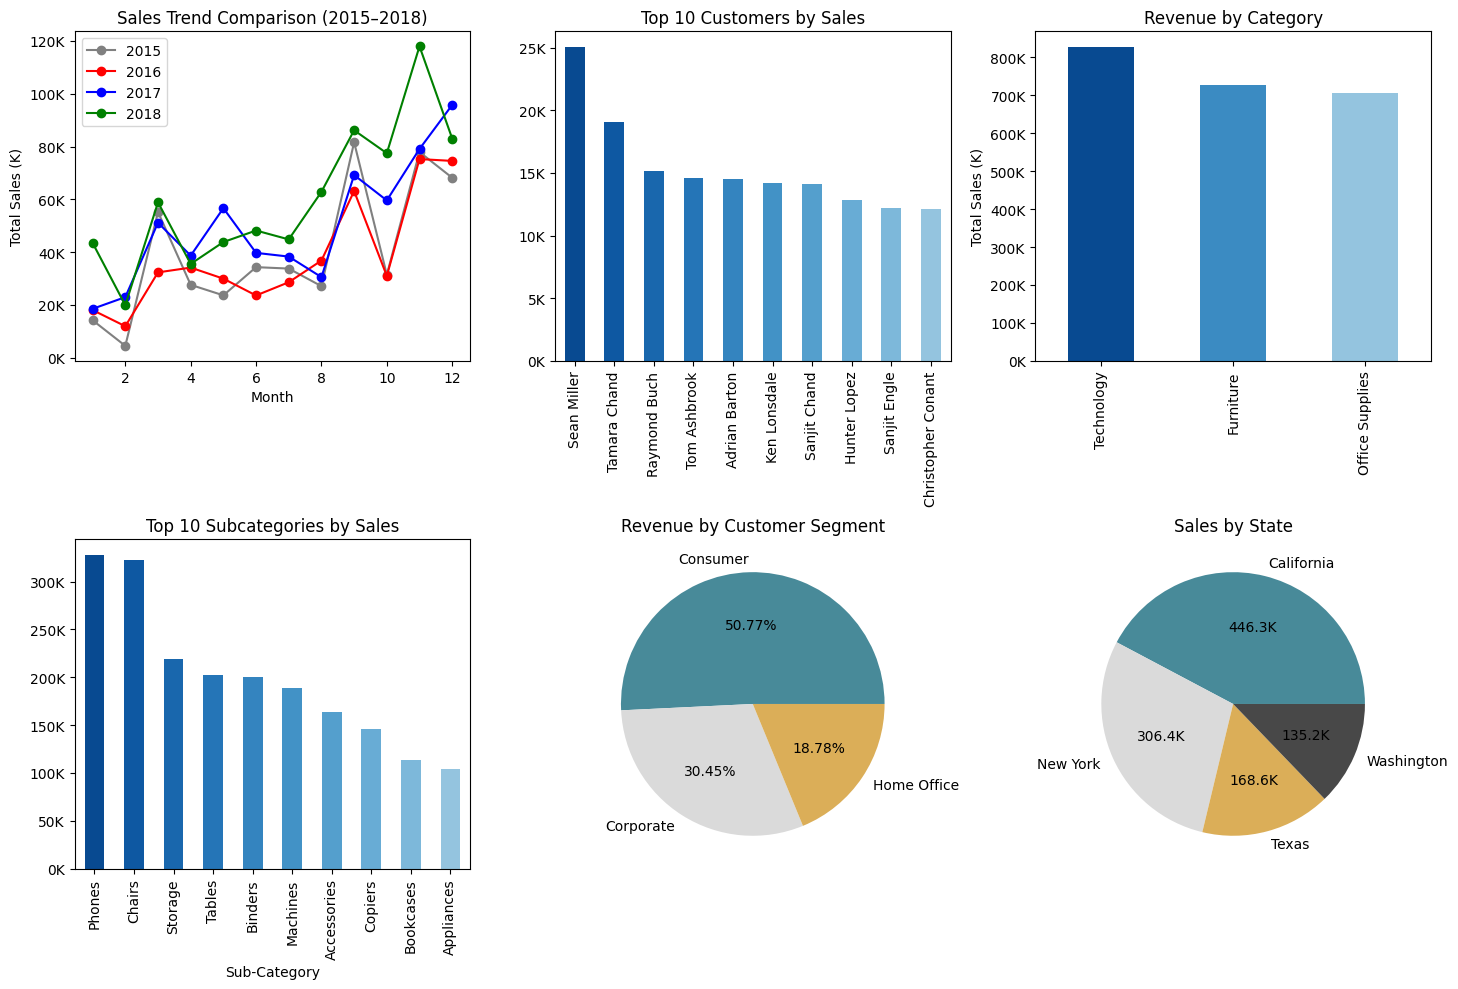

In [46]:
# Custom colors
custom_color = "#488A99"
pie_colors = ['#488A99', '#DADADA', '#DBAE58' ,'#484848']
cmap = cm.get_cmap('Blues')  # Gradient for bars

# Data aggregations
top_customers = df.groupby("Customer Name")["Sales"].sum().nlargest(10)
cat_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sub_sales = df.groupby("Sub-Category")["Sales"].sum().nlargest(10)

# Color gradients for bars
customer_colors = [cmap(i) for i in np.linspace(0.9, 0.4, len(top_customers))]
category_colors = [cmap(i) for i in np.linspace(0.9, 0.4, len(cat_sales))]
subcat_colors = [cmap(i) for i in np.linspace(0.9, 0.4, len(sub_sales))]

# Colors for years in Monthly Sales Trend
year_colors = {
    2015: 'gray',
    2016: 'red',
    2017: 'blue',
    2018: 'green'
}

# Create a 2×3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Monthly Sales Trend Comparison
for year in df_monthly_trend.columns:
    axes[0, 0].plot(df_monthly_trend.index, df_monthly_trend[year],
                    marker='o', label=str(year), color=year_colors[year])
axes[0, 0].set_title("Sales Trend Comparison (2015–2018)", color='black')
axes[0, 0].set_ylabel("Total Sales (K)")
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
axes[0, 0].set_xlabel("Month")
axes[0, 0].legend()

# 2. Top 10 Customers by Sales
top_customers.plot(kind="bar", color=customer_colors, ax=axes[0, 1])
axes[0, 1].set_title("Top 10 Customers by Sales", color='black')
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
axes[0,1].set_xlabel("")

# 3. Revenue by Category
cat_sales.plot(kind="bar", color=category_colors, ax=axes[0, 2])
axes[0, 2].set_title("Revenue by Category", color='black')
axes[0, 2].set_ylabel("Total Sales (K)")
axes[0, 2].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
axes[0,2].set_xlabel("")

# 4. Top Subcategories by Sales
sub_sales.plot(kind="bar", color=subcat_colors, ax=axes[1, 0])
axes[1, 0].set_title("Top 10 Subcategories by Sales", color='black')
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# 5. Revenue by Segment - Pie Chart
df.groupby("Segment")["Sales"].sum().plot(
    kind="pie", autopct="%.2f%%", colors=pie_colors, ax=axes[1, 1])
axes[1, 1].set_title("Revenue by Customer Segment", color='black')
axes[1, 1].set_ylabel("")


# 6. Sales by State - Pie Chart (Top 4)
top_states = df.groupby("State")["Sales"].sum().nlargest(4)
# Custom function to format values in "K"
def format_k_labels(values):
    def label_function(pct):
        total = sum(values)
        value = int(pct * total / 100.0)
        return f'{value/1000:.1f}K'
    return label_function

# Plot
top_states.plot(
    kind="pie",
    autopct=format_k_labels(top_states),
    colors=pie_colors,
    ax=axes[1, 2]
)

axes[1, 2].set_title("Sales by State", color='black')
axes[1, 2].set_ylabel("")


# Layout adjustment
plt.tight_layout()
plt.show()


**📊 Summary after analysis**

* **Total sales** was  $2.26M
* Average sales by category was 753.751 k
* It is noticeable that the number of **orders increases** gradually each year, but this does not necessarily mean that total sales are higher, as it depends on the quantity and price of each product ordered.

* **Sales increase** in "March" ,"September" and become highst peak at "November" ِalso **sales deacrsed** in "February" and "October" in each year . I believe this increase is due to the beginning of a new season, such as summer, sales increase as customer purchase more items .

* Additionally, in September, the start of a new school year contributes to higher sales, while in November, the rise is driven by White Friday discounts.

* **Revenue for each year** increasd gradually except year 2016 the sales decreased by 4.2% from 2015.

* **The bottom year** in sales was 2016 ($ 460K ) ,after this year the sales increase gradually and reach **the Top** in 2018 ($ 722K ).

* **"Consumer" Segment** have 50% of Purshases so we should pay atttention by this segment for a better future of our business.

* **Technology products** were the top category in sales and **"office supplies"** were the bottom.

* "Phones" were **the Top** sales(327K).
* "California", "New York" , "Texas" were **the Top states** by sales.
* "New York" ,"Los Angeles" and"Seattle" were **the Top Cities** by sales.
* Top our **loyalty Customers** were: " Sean Miller" , Tamara Chand" ,"Raymond Buch" .

* **60%** of **shipping modes** preferred by customers was "Standard Class" there is beacuse it was suitable in money .

* **Average shipping time** was 4 days from complete the order to deliver the customer.





* **Total Sales**: $2.26M

* **Average Sales** by Category: $753.75K

**🔍 Key Insights:**

 *  The number of orders increased gradually each year. However, this did not always result in higher total sales, as sales depend on both product quantity and price.

**Sales Trends by Month:**

* Sales tend to peak in March, September, and November, with November showing the highest sales—likely due to White Friday discounts.

* Sales typically drop in February and October each year.
* The increase in March may be related to seasonal purchases, while September growth aligns with the back-to-school season.

**Yearly Revenue Performance:**

* Revenue increased steadily except in 2016, which saw a 4.2% decrease compared to 2015.

* The lowest sales year was 2016 ($460K), while 2018 recorded the highest sales ($722K).

**🧑‍🤝‍🧑 Customer Segments & Preferences:**
* The "Consumer" segment contributed to 50% of all purchases. This group should be a key focus for future marketing and sales strategies.

**Preferred Shipping Mode:**

* 60% of shipping modes preferred by customers was "Standard Class" —likely due to its cost-effectiveness.

**Average Shipping Time:**

* Approximately 4 days from order completion to delivery.

**🏆 Top Performers:**
* Top Product Category: Technology

* Lowest Sales Category: Office Supplies

* Top-Selling Product: Phones ($327K)

* Top States by Sales:
California, New York, Texas

* Top Cities by Sales:
New York, Los Angeles, Seattle

* Top Loyal Customers:
Sean Miller, Tamara Chand, Raymond Buch

**6-💼Business Recommendations**





**Focus on the Consumer Segment**

* The Consumer segment accounts for 50% of total sales. Enhancing customer service, offering loyalty programs, and targeted promotions for this segment could significantly boost revenue.


**Capitalize on Peak Months**

* November, March, and September consistently show high sales. Plan seasonal campaigns and promotions ahead of these months.

**Marketing Campagins**

* Consider stocking up inventory before these peaks and running marketing campaigns aligned with seasonal demand (e.g., Back-to-School in September, Black/White Friday in November).

**Study and enhance the Drop in February and October**

* Develop strategies to boost sales during slower months. Options include limited-time discounts, product bundles, or free shipping offers in February and October.

**Improve Revenue Consistency**

* 2016 saw a 4.2% drop in sales. Analyzing causes (e.g., supply chain, product mix, or external factors) and creating risk mitigation plans can help maintain consistent growth.

**Expand Best-Selling Categories**

* Technology (especially Phones) is the top-performing category. Consider introducing new tech products, accessories, or exclusive deals to boost upselling and cross-selling.

**Optimize Shipping Strategy**

* 60% of orders used Standard Class shipping. Explore options to make faster shipping more affordable, or offer free standard shipping thresholds to increase cart sizes.

**Invest in Top Regions**

* States like California, New York, and Texas, and cities such as New York City, Los Angeles, and Seattle generate the most revenue. Focus advertising, inventory, and service optimization efforts here to further capitalize.

**Leverage Top Customers**

* Loyal customers like Sean Miller, Tamara Chand,  Raymond Buch (to 20 top selling customers) have strong purchasing power. Consider exclusive VIP programs, early access to sales, or referral rewards for this group.

**Diversify Product Offerings in Low-Performing Categories**

* "Office Supplies" is the weakest category. Review customer needs, improve product variety, or create value bundles to attract more purchases in this segment.

**Shorten Delivery Time (if possible)**

* Current average delivery is 4 days. Faster delivery could improve customer satisfaction and retention—especially for premium or urgent product lines.

**Thank You**